![Picture title](image-20210418-182652.png)

The image was taken from [wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Tripadvisor_Logo_circle-green_vertical-lockup_registered_RGB.svg/1200px-Tripadvisor_Logo_circle-green_vertical-lockup_registered_RGB.svg.png)

# Introduction
In this project, we will be exploring the hotel reviews and the rating base on customer hotel experience. We will be also looking at feature engineering and designing a deep learning model to predict ratings based on reviews. We will be using NLP tools for feature extractions and preparing the data for deep learning models.
## About Tripadvisor
**Tripadvisor, Inc.** is an American online travel company that operates a website and mobile app with user-generated content and a comparison shopping website. It also offers online hotel reservations and bookings for transportation, lodging, travel experiences, and restaurants. Its headquarters are in Needham, Massachusetts. [Wikipedia](https://en.wikipedia.org/wiki/Tripadvisor)
## About this dataset
Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!


# Import Libraries 

In [ ]:
## All purpose
import pandas as pd 
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from gensim.summarization import keywords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Data Exploration

**The Tripadvisor Dataset is available publicly available on [Zenodo](https://zenodo.org/record/1219899#.YHwt1J_ivIU)**[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.1219899.svg)](https://doi.org/10.5281/zenodo.1219899) AttributionNon-Commerical
Attribution-NonCommercial 4.0 International

## Preprocessing 

### VADER-Sentiment-Analysis
**[VADER](https://github.com/cjhutto/vaderSentiment#introduction)** (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the [MIT License](http://choosealicense.com/) (we sincerely appreciate all attributions and readily accept most contributions, but please don't hold us liable).


### Compund score & Sentiment
Using Vader to get sentimental scores and then converting those scores into 3 categorical Sentiments, Positive Negative, and Neutral.

In [ ]:
## Creating sentimental polarity 
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

### Applying functions

Applying both functions to our original database to create two additional columns of **Sentiment_score** and **Sentiment**.

In [ ]:
## Importing CSV file
df = pd.read_csv("tripadvisor_hotel_reviews.csv")

## Applying Compund score
polarity_scores = df["Review"].astype("str").apply(compound_score)
df["Sentiment_Score"] = polarity_scores

## Applying Sentiment
df["Sentiment"] = df["Sentiment_Score"].apply(sentiment)

### Saving file 

Saving file so it can be used later for another project.

In [ ]:
## Saving preprocessed file 
df.to_csv("Trip-Advisor-rating-sentiments.csv",index=False)
df.Sentiment.value_counts()

Positive    18320
Negative     1090
Neutral      1081
Name: Sentiment, dtype: int64

## Loading Preprocessed Dataset

The Dataset contains four columns ** Review - Rating - Sentiment_score - Sentiment**

In [ ]:
# Importing the Trip-Advisor-Hotel-Review Dataset
data=pd.read_csv('Trip-Advisor-rating-sentiments.csv')

# Having a look at the data
data.head()

,Review,Rating,Sentiment_Score,Sentiment
0,nice hotel expensive parking got good deal sta...,4,0.9626,Positive
1,ok nothing special charge diamond member hilto...,2,0.9870,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,0.9842,Positive
3,"unique, great stay, wonderful time hotel monac...",5,0.9920,Positive
4,"great stay great stay, went seahawk game aweso...",5,0.9870,Positive


### Checking Missing Values
No missing data in out dataset.

In [ ]:
data.isna().sum()

Review             0
Rating             0
Sentiment_Score    0
Sentiment          0
dtype: int64

## Countplot of Sentiments
Most of the coments are Positive, as shown in seaborn countplot

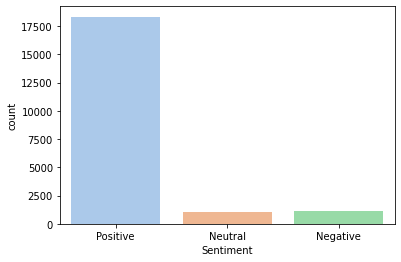

In [ ]:
sns.countplot(data=data,x="Sentiment",palette="pastel");

# Visualization 

## Plotting the Bar Graph

In the bar plot, we can see the distribution of sentiment and rating, people with 5-star ratings have the highest positive sentiment. whereas at lower ratings its mixed emotions showed by customers review, this can be related to sarcasm 

In [ ]:
# Preparing data for visualization 
Viz_1 = data[['Rating','Sentiment']].value_counts().rename_axis(['Rating','Sentiment']).reset_index(name='counts')

# Plotting the Bar Graph 
fig = px.bar(x=Viz_1.Rating, y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

## Plotting a pie chart of ratings

A simple pie chart using Plotly library can give you an idea of the distribution of different ratings. The majority of people are giving a positive and 4-5star rating.

In [ ]:
#Viz2 Data preparation 
Viz_2 = data['Rating'].value_counts().rename_axis(['Rating']).reset_index(name='counts')
    
# Plotting  pie chart for ratings
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2.Rating, title='Rating Distribution of the data',color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()

## Jointplot on the basis of Rating and Sentiment Score.
Joint plot reg shows on who sentimental score is directly affected by ratings, but it all over the place, you won't find certain pattern or clusters.

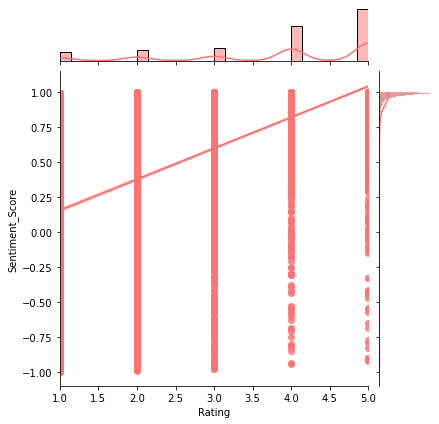

In [ ]:
# Jointplot on the basis of Rating and Sentiment Score of the data
jp = sns.jointplot(data=data,x='Rating',y='Sentiment_Score',kind="reg",color='#ff7373')
# jp.fig.suptitle('Jointplot on the basis of Rating and Sentiment Score of the data',fontsize=20);

## Violin plot
Violion plot gives us a better picture of the relationship between Ratings and Sentiments. From 3 to 5 rating most of the review sentiments are positive.

In [ ]:
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x=data['Rating'][data['Rating'] == rating],
                            y=data['Sentiment_Score'][data['Rating'] == rating],
                            name=rating,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title="Violin plot of Rating and Sentiment Score with box plot",
    xaxis_title="Rating",
    yaxis_title="Sentiment Score",
    font=dict(
        family="Courier New, monospace",
        size=12,
        
    )
)
fig.show()

## ![Picture title](image-20210418-203020.png) Trying Deepnote input drop down for fun
Just discoverd some of the input tools prvided by Deepnote and I have taken full advantages of these tools.

In [ ]:
Sentiment = 'Negative'

### Wordcloud of Different Sentiments

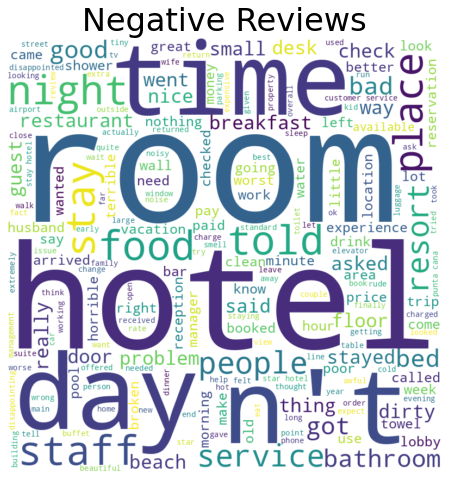

In [ ]:
text1 =''
for i in data[data['Sentiment']==str(Sentiment)]['Review'].values:
    text1+=i + ' '
    
wc = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True,)
wc.generate(text1)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(Sentiment+' Reviews',fontsize=32);

## Wordcloud of all three sentiments
The most common word used in all three Sentiments was a hotel room. Which is quite obvious and simple to focus on if you want a better rating from customers. 

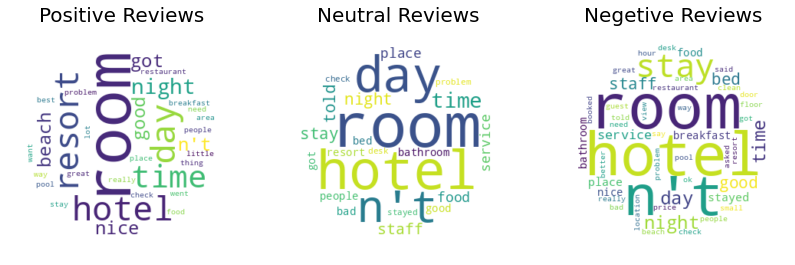

In [ ]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 14], facecolor = None)

text1 =''
for i in data[data['Sentiment']=='Positive']['Review'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('Positive Reviews',fontsize=20);

text2 =''
for i in data[data['Sentiment']=='Negative']['Review'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('Neutral Reviews',fontsize=20);

text3 =''
for i in data[data['Sentiment']=='Neutral']['Review'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('Negetive Reviews',fontsize=20);

plt.show()

## Wordcloud of all 5 Ratings
They all look almost similar so what ever the situation is people are mostly talking about **hotel rooms** and **day** from 1-5 star ratings.

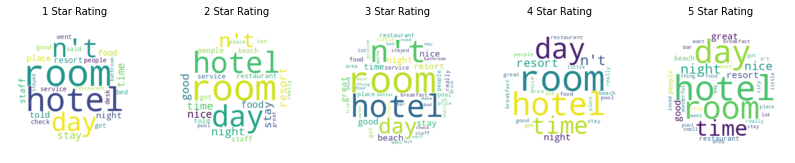

In [ ]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[14, 14], facecolor = None)

## Text 1
text1 =''
for i in data[data['Rating']==1]['Review'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 400, height = 400,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('1 Star Rating',fontsize=10);

## Text 2
text2 =''
for i in data[data['Rating']==2]['Review'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 400, height = 400,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('2 Star Rating',fontsize=10);

## Text 3
text3 =''
for i in data[data['Rating']==3]['Review'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 400, height = 400,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('3 Star Rating',fontsize=10);

## Text 4
text4 =''
for i in data[data['Rating']==4]['Review'].values:
    text4+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc4 = WordCloud(width = 400, height = 400,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc4.generate(text4)

ax4.axis("off")
ax4.imshow(wc4, interpolation="bilinear")
ax4.set_title('4 Star Rating',fontsize=10);

## Text 5
text5 =''
for i in data[data['Rating']==5]['Review'].values:
    text5+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc5 = WordCloud(width = 400, height = 400,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc5.generate(text5)

ax5.axis("off")
ax5.imshow(wc5, interpolation="bilinear")
ax5.set_title('5 Star Rating',fontsize=10);

plt.show()

# Keywords

## Testing Gensim Keywords
``gensim.summarization.keywords ``

This module contains functions to find keywords of the text and building graph on tokens from text. **More can be found at [Gensim](https://radimrehurek.com/gensim_3.8.3/summarization/keywords.html)**

*I have used Deepnote input and added random text from the internet to test our Gensim Keyword function.*

In [ ]:
input_1 = 'AI Platform Pipelines has two major parts: (1) the infrastructure for deploying and running structured AI workflows that are integrated with Google Cloud Platform services and (2) the pipeline tools for building, debugging, and sharing pipelines and components. The service runs on a Google Kubernetes cluster that’s automatically created as a part of the installation process, and it’s accessible via the Cloud AI Platform dashboard. With AI Platform Pipelines, developers specify a pipeline using the Kubeflow Pipelines software development kit (SDK), or by customizing the TensorFlow Extended (TFX) Pipeline template with the TFX SDK. This SDK compiles the pipeline and submits it to the Pipelines REST API server, which stores and schedules the pipeline for execution'

In [ ]:
keywords(input_1).split("\n")

['pipelines',
 'pipeline',
 'platform',
 'developers',
 'development',
 'sdk',
 'tfx',
 'kubernetes']

## Applying Keywords to the Dataframe

In [ ]:
data["keywords"] = data["Review"].apply(keywords)
data["keywords"] = data["keywords"].astype("str").str.replace('\n',',',) 

In [ ]:
words = []
for x in data.keywords.values:
    x=x.split(",")
    for i in x:
        words.append(i)


## Using Counter
Python Counter is a container that will hold the count of each of the elements present in the container. **More information can be found here [guru99](https://www.guru99.com/python-counter-collections-example.html)**

In [ ]:
from collections import Counter
word_counter = Counter(words)

In [ ]:
word_df = pd.DataFrame(np.array(list(word_counter.items())),columns=["keyword","count"])

## Top Ten Keywords

In [ ]:
word_df["count"] = word_df["count"].astype(int)
word_df = word_df.sort_values(['count'], ascending=False)
top_20 = word_df[0:19]
word_df.head(10)

,keyword,count
12,hotel,7995
4,room,7748
1,stay,4708
108,rooms,4477
61,great,3073
131,stayed,2743
26,good,2741
13,hotels,2372
37,staff,2293
5,night,2178


## Barplot of Top 20 Keywords

apart from hotel rooms users are also talking about staff, location and breakfast.

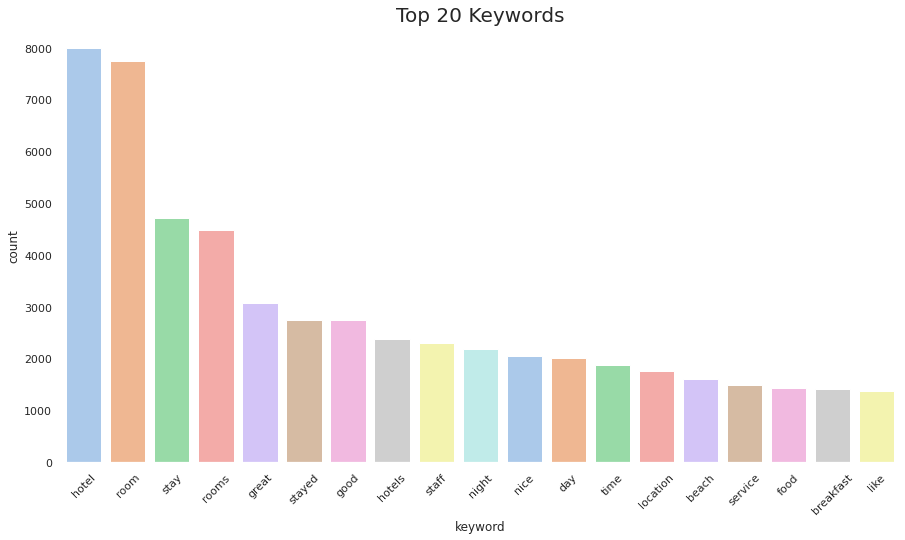

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.barplot(data=top_20,x="keyword",y="count",palette="pastel")
ax.patch.set_visible(False)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Top 20 Keywords",fontsize=20);

# Review Text Processing using NLTK

## Downloading NLTK 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Stopwords
The stop words are words which are filtered out before or after processing of natural language data (text). Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search. [Wikipedia](https://en.wikipedia.org/wiki/Stop_word)

In [ ]:
data2=data.copy()
      
def removing_stop_words(txt):
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(txt) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
     
    return filtered_sentence
    
data2["Review"] = data2["Review"].apply(removing_stop_words)

## Text Lemmatizer
Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors. **For more information visit** [Lemmatization Approaches with Examples in Python](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/)

In [ ]:
# Making a function to lemmatize 
lemmatizer = WordNetLemmatizer() 
def lemmatize(data):
    lema_data=[]
    for j in data:
        x=j.lower()
        x=lemmatizer.lemmatize(j,pos='n')
        x=lemmatizer.lemmatize(j,pos='v')
        x=lemmatizer.lemmatize(j,pos='a')
        x=lemmatizer.lemmatize(j,pos='r')
        x=lemmatizer.lemmatize(x)
        lema_data.append(x)
    return lema_data


data2["Review"] = data2["Review"].apply(lemmatize)

## Text Joining
Making all the comma seperated lemmatized words back into a string

In [ ]:
data2["Review"] = data2["Review"].apply(lambda x:" ".join(token for token in x))

In [ ]:
data2.head(2)

,Review,Rating,Sentiment_Score,Sentiment,keywords
0,nice hotel expensive parking got good deal sta...,4,0.9626,Positive,"parking,stay,staying,nice hotel,room,night,hal..."
1,ok nothing special charge diamond member hilto...,2,0.9870,Positive,"hotel,hotels,room,suite,suites,suits,arrival e..."


You can use PoerterStemmer to improve the performance and you can also use other yet processing to improve the performance metric.

## Tokenizer
The Tokenizer class of Keras is used for vectorizing a text corpus. For this either, each text input is converted into integer sequence or a vector that has a coefficient for each token in the form of binary values.

In [ ]:
X = data2["Review"].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

## Texts to Sequences
texts_to_sequences method helps in converting tokens of text corpus into a sequence of integers. more can be learned from [machinelearningknowledge.ai](https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/)

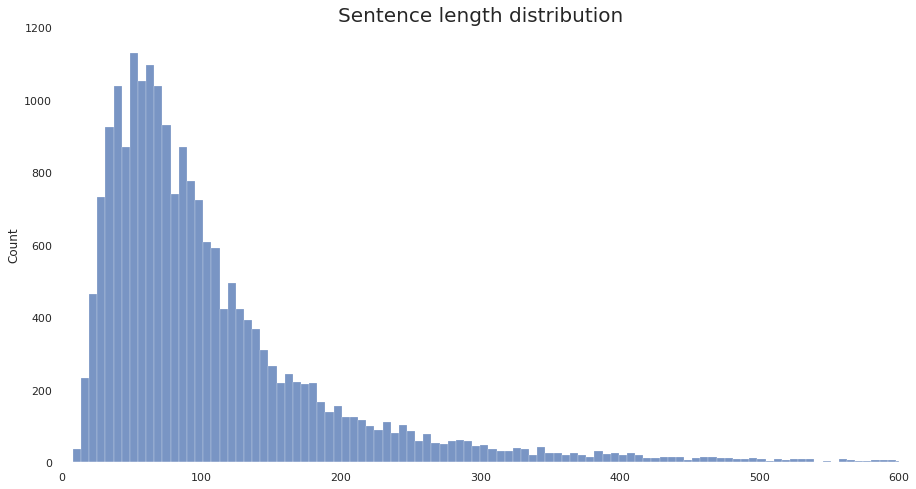

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
length_dist = [len(x.split(" ")) for x in X]
sns.histplot(length_dist,palette="pastel")
ax.patch.set_visible(False)
ax.set_xlim(0,600)
ax.set_ylim(0,1200)
ax.set_title("Sentence length distribution",fontsize=20);
plt.show()

In [ ]:
X = tokenizer.texts_to_sequences(X)

max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))

Vocabulary size: 49204
max length of sentence: 1968


In [ ]:
# Padding the reviews [Pads sequences to the same length.]
X = pad_sequences(X, padding='post', maxlen=600)

## Remapping Ratings
remaping of ratings wil help us reduce model output size from 6 to 5, which will improve the results.

In [ ]:
labels = ['1', '2', '3', '4', '5']
          
y = data['Rating']
y = y.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })

# Training

## Train Test split
spliting our data into 90 percent Train and 10 percent test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

## Hyper parameters
These hyperparameters were selected by experimenting and these are the best parameters I can get using this model.

In [ ]:
EPOCHS = '2'

In [ ]:
embedding_dim = '16'

In [ ]:
BATCH_SIZE = '125'

In [ ]:
units = '76'

In [ ]:
val_split = '0.12'

## Bidirectional LSTM Model 
My model was highly influenced by Analytics-Vidhya artical [Author(Multi-class text) Classification using Bidirectional LSTM & Keras](https://medium.com/analytics-vidhya/author-multi-class-text-classification-using-bidirectional-lstm-keras-c9a533a1cc4a)

### Recurrent Neural Network:
Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step. This is a short-term memory to process Sequential data(Speech data, Music, Sequence of words in a text). Here is a sample architecture diagram.
![Picture title](image-20210419-005153.png)
Source: https://doi.org/10.1371/journal.pone.0180944.g004

### Advantages:
- RNN has a memory that captures what has been calculated so far.
-  RNNs are ideal for text and speech data analysis.
### Disadvantages:
- RNN suffers from exploding and vanishing gradient, which makes the RNN model learn slower by propagating a lesser amount of error backward.
- This works well for short sentences, when we deal with a long article, there will be a long term dependency problem

### Long Short Term Memory(LSTM) :
Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition,speech recognition and anomaly detection in network traffic or IDSs (intrusion detection systems). **Definition is from [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)**

In [ ]:
model = tf.keras.Sequential([
    L.Embedding(vocab_size, int(embedding_dim), input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(int(units),return_sequences=True)),
    L.Conv1D(64,3),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.2),
    L.Dense(128, activation="relu"),
    L.Dropout(0.2),
    L.Dense(64, activation="relu"),
    L.Dropout(0.2),
    L.Dense(5, activation="softmax")
])

## Compiling Model
Using Sparse Categorical Crossentropy, Accuracy metric and ADAM optimizer for training.

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 16)           787264    
_________________________________________________________________
bidirectional (Bidirectional (None, 600, 152)          56544     
_________________________________________________________________
conv1d (Conv1D)              (None, 598, 64)           29248     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 299, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 19136)             0         
_________________________________________________________________
dropout (Dropout)            (None, 19136)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

## Training for 2 EPOCHS
After 2 EPOCHS the model metrics starts to fall, so 2 is enought to get best result.

In [ ]:
history = model.fit(X_train, y_train, epochs=int(EPOCHS), validation_split=float(val_split), batch_size=int(BATCH_SIZE), verbose=2)

Epoch 1/2
130/130 - 384s - loss: 1.1719 - accuracy: 0.4808 - val_loss: 0.9145 - val_accuracy: 0.5779
Epoch 2/2
130/130 - 490s - loss: 0.8244 - accuracy: 0.6342 - val_loss: 0.8260 - val_accuracy: 0.6268


# Metrics

## Accuracy of Train vs Validation

In [ ]:
fig = px.line(
    history.history, y=['accuracy', 'val_accuracy'],
    labels={'index': 'epoch', 'value': 'accuracy'}
)

fig.show()

## Sparse Categorical Crossentropy of Train vs Validation

In [ ]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}
)

fig.show()

## Prediction

In [ ]:
pred = model.predict(X_test)
pred_final = np.argmax(pred,axis=-1)
pred_final

array([0, 4, 2, ..., 4, 2, 4])

## Accuracy score on Test Data


![Picture title](image-20210419-013507.png)

This is the best score I got from predicting test data. This could be improved by using a better deep learning model and text processing.

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}'.format(accuracy_score(pred_final, y_test)))

Accuracy: 0.6375609756097561


## Root Mean Square Error on Test Data
The root-mean-square deviation or root-mean-square error is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.

![Picture title](image-20210419-013909.png)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Root mean square error: {}".format(np.sqrt(mean_squared_error(pred_final,y_test))))

Root mean square error: 0.7071067811865476


## Confusion Matrix Heatmap
My model have accuracty predicted rating 1, 4 and 5. Its due to imbalce data as our data have more 4-5 star ratings. This could be solved by using more balnced data or using more samples to train the models.

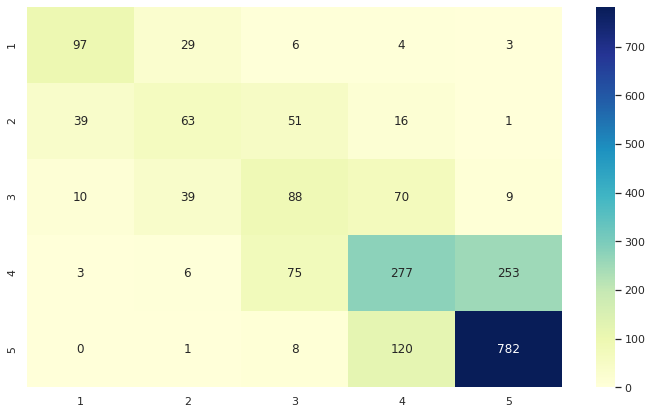

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
conf = confusion_matrix(y_test, pred_final)

cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d",cmap="YlGnBu")
plt.show()

## Classification Report 
5th Rated class was accurately predicted on all three metrics and 4th class was the second-best predicted class. You can dive into the world of classification reports and find your conclusion.

In [ ]:
print(classification_report(y_test, pred_final, target_names=labels))

              precision    recall  f1-score   support

           1       0.65      0.70      0.67       139
           2       0.46      0.37      0.41       170
           3       0.39      0.41      0.40       216
           4       0.57      0.45      0.50       614
           5       0.75      0.86      0.80       911

    accuracy                           0.64      2050
   macro avg       0.56      0.56      0.56      2050
weighted avg       0.62      0.64      0.63      2050



## Saving model

In [ ]:
model.save("Tripadvisor_BiLSTM.h5")

## Testing Saved model

In [ ]:
new_model = tf.keras.models.load_model('Tripadvisor_BiLSTM.h5')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 16)           787264    
_________________________________________________________________
bidirectional (Bidirectional (None, 600, 152)          56544     
_________________________________________________________________
conv1d (Conv1D)              (None, 598, 64)           29248     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 299, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 19136)             0         
_________________________________________________________________
dropout (Dropout)            (None, 19136)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

## Conclusion

### Deepnote Experience
Deepnote has improved a lot in terms of user experience and ease of use. I think writing my code and running my deep learning model was quite easy. In the end, I learned a lot from using Deepnote text input and how to integrate then tune hyperparameters.

### Tripadvisor Prediction model
Overall my deep learning model performed well with limited resources and memory restrain. I think using the BERT model can increase accuracy by +20 percent. I haven't experimented with other ML models, but in my experience with gradient booster and logistic models do not perform well in text classification. 

### Final Thoughts
Sentiments of reviews were all over the place and they did not have any effect on ratings. In reviews sometimes people are being sarcastic which is hard to pick by machine without context. Overall by analyzing keywords I have realized people were mostly writing reviews about the Hotel room, service, staff, and breakfast. Which is a good indicator of what a hotel management team can focus on to get better reviews and 5 stars. 

## Thank you for going through my work and dont forget to ❤ it.

![Picture title](image-20210418-182947.png)

The image was taken from [prweb](https://www.prweb.com/releases/2015/07/prweb12875724.htm)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6060b39-d76c-4579-9648-a54bc8b5ffb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>